In [2]:

import os
import sys
import importlib
import copy
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'distribution_123share_vs_random_210116'

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

import compress_pickle
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]

z_min = 10
z_max = 40
# z_min = 20000
# z_max = 30000
x_min = 360
x_max = 520
# radius = 200

n_randoms = 20

def get_prob(in_graph ):
    n_common_pairs = 0
    processed = set()
    total_n_pairs = 0
    hist = defaultdict(int)
    n = 0
    for grc_i_id in in_graph.grcs:
        n += 1
        if n % 1000 == 0:
            print(n, end=', ')
        grc_i = in_graph.grcs[grc_i_id]
        # x, y, z = grc_i.soma_loc
        # if x < x_min*1000 or x > x_max*1000:
        #     continue
        # if z < z_min*1000 or z > z_max*1000:
        #     continue
        rosettes_i = set([mf[0] for mf in grc_i.edges])
        for grc_j_id in in_graph.grcs:
            if grc_i_id == grc_j_id:
                continue
            if (grc_i_id, grc_j_id) in processed:
                continue
            processed.add((grc_i_id, grc_j_id))
            processed.add((grc_j_id, grc_i_id))
            grc_j = in_graph.grcs[grc_j_id]
            common_rosettes = set([mf[0] for mf in grc_j.edges])
            common_rosettes = common_rosettes & rosettes_i
            hist[len(common_rosettes)] += 1
    for k in hist:
        # fix 0 datapoint plots
        if hist[k] == 0:
            hist[k] = 1
    return hist

input_observed = copy.deepcopy(input_graph)
hist_data = get_prob(input_observed)


In [4]:

hist_randoms = []

for n in range(n_randoms):
    # input_graph.randomize_graph(random_model=True)
    input_graph.randomize_graph_by_grc(
        single_connection_per_pair=True,
        constant_grc_degree=4,
        constant_dendrite_length=15000,
        always_pick_closest_rosette=True,
        )
    hist_random = get_prob(input_graph)
    hist_randoms.append(hist_random)


Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369


In [6]:

hist_random2s = []

for n in range(n_randoms):
    # input_graph.randomize_graph(random_model=True)
    input_graph.randomize_graph_by_grc(
        single_connection_per_pair=True,
        constant_grc_degree=4,
        constant_dendrite_length=15000,
#         always_pick_closest_rosette=True,
        )
    hist_random2 = get_prob(input_graph)
    hist_random2s.append(hist_random2)


Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369


In [7]:

hist_ex_30s = []

for n in range(n_randoms):
    input_graph.randomize_graph_by_grc(
        single_connection_per_pair=True,
        constant_grc_degree=4,
        # constant_dendrite_length=constant_dendrite_length,
        # always_pick_closest_rosette=True,
        dendrite_range=(0, 30000),
        )
    hist_ex_30 = get_prob(input_graph)
    hist_ex_30s.append(hist_ex_30)


Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369
Average num_claw_per_grc: 4.003690036900369


In [8]:


global_random_n_grcs, hist_global_random = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_analysis/share_distribution/gen_global_random_7k_204k_data_2000.gz')

import compress_pickle
compress_pickle.dump((
    hist_data,
    hist_random,
    global_random_n_grcs,
    hist_global_random,
    ), f"{script_n}_data.gz")
# normalize

# total_n_pairs = hist_data[0] + hist_data[1] + hist_data[2] + hist_data[3]
n_grcs = len(input_graph.grcs)
# global_random_n_grcs = 204000


Height: 2.142857142857143, Aspect: 1.4


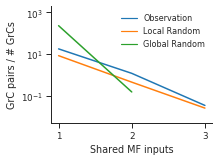

In [24]:

mpd_data = MyPlotData()
for n_share in [1, 2, 3]:
    if n_share in hist_data:
        mpd_data.add_data_point(
            n_share=n_share,
            count=hist_data[n_share]/n_grcs,
            type='Observation',
            )
#     for hist_random in hist_randoms:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Local Random',
#                 )
    for hist_random in hist_random2s:
        if n_share in hist_random:
            mpd_data.add_data_point(
                n_share=n_share,
                count=hist_random[n_share]/n_grcs,
                type='Local Random',
                )
#     for hist_ex_30 in hist_ex_30s:
#         if n_share in hist_ex_30:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_ex_30[n_share]/n_grcs,
#                 type='LocalEx Random',
#                 )
    if n_share in hist_global_random:
        mpd_data.add_data_point(
            n_share=n_share,
            # need to divide by 2 because we're sampling only 2/200 grcs
            # (or multiply others by 2)
            count=hist_global_random[n_share]/global_random_n_grcs/2,
            type='Global Random',
            )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, markerscale=2, prop={'size': 8})


# importlib.reload(my_plot); my_plot.my_relplot(
#     mpd_data,
#     x='n_share',
#     y='count',
#     hue='type',
#     # hue_order=['Data', 'Random Model'],
#     kind='scatter',
#     context='paper',
#     # ylim=[.005, 50],
#     ylim=[.005, 2000],
#     xlim=[.7, 3.3],
#     log_scale_y=True,
#     s=150,
#     # xticklabels=['', 1, '', 2, '', 3, ''],
#     xticks=[1, 2, 3],
#     height=4,
#     aspect=1.1,
#     custom_legend_fn=custom_legend_fn,
#     y_axis_label='GrC pairs / # GrCs',
#     x_axis_label='Shared Inputs',
#     # save_filename=f'{script_n}.pdf',
#     save_filename=f'{script_n}.svg',
#     show=True,
#     )


importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
    y='count',
    hue='type',
    # hue_order=['Data', 'Random Model'],
    kind='line',
    err_style="bars",
    ci=68,
    markers=True,
    dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
    ylim=[.005, 2000],
    xlim=[.9, 3.1],
    log_scale_y=True,
#     s=150,
    # xticklabels=['', 1, '', 2, '', 3, ''],
    xticks=[1, 2, 3],
#     height=4,
    width=3,
    aspect=1.4,
    font_scale=1,
    custom_legend_fn=custom_legend_fn,
    y_axis_label='GrC pairs / # GrCs',
    x_axis_label='Shared MF inputs',
    # save_filename=f'{script_n}.pdf',
    save_filename=f'{script_n}_line.svg',
    show=True,
    )


Height: 4, Aspect: 1.1


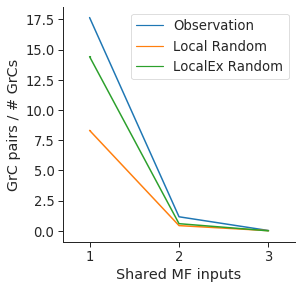

In [12]:

mpd_data = MyPlotData()
for n_share in [1, 2, 3]:
    if n_share in hist_data:
        mpd_data.add_data_point(
            n_share=n_share,
            count=hist_data[n_share]/n_grcs,
            type='Observation',
            )
#     for hist_random in hist_randoms:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Local Random',
#                 )
    for hist_random in hist_random2s:
        if n_share in hist_random:
            mpd_data.add_data_point(
                n_share=n_share,
                count=hist_random[n_share]/n_grcs,
                type='Local Random',
                )
    for hist_ex_30 in hist_ex_30s:
        if n_share in hist_ex_30:
            mpd_data.add_data_point(
                n_share=n_share,
                count=hist_ex_30[n_share]/n_grcs,
                type='LocalEx Random',
                )
#     if n_share in hist_global_random:
#         mpd_data.add_data_point(
#             n_share=n_share,
#             # need to divide by 2 because we're sampling only 2/200 grcs
#             # (or multiply others by 2)
#             count=hist_global_random[n_share]/global_random_n_grcs/2,
#             type='Global Random',
#             )


importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
    y='count',
    hue='type',
    # hue_order=['Data', 'Random Model'],
    kind='line',
    err_style="bars",
    ci=68,
    markers=True,
    dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
#     ylim=[.005, 2000],
    xlim=[.7, 3.3],
#     log_scale_y=True,
#     s=150,
    # xticklabels=['', 1, '', 2, '', 3, ''],
    xticks=[1, 2, 3],
    height=4,
    aspect=1.1,
    custom_legend_fn=custom_legend_fn,
    y_axis_label='GrC pairs / # GrCs',
    x_axis_label='Shared MF inputs',
    # save_filename=f'{script_n}.pdf',
    save_filename=f'{script_n}_line_linear.svg',
    show=True,
    )


In [28]:
print(hist_data)
print(hist_random)
print(hist_data[2]/n_grcs)

defaultdict(<class 'int'>, {0: 136396, 1: 9561, 2: 634, 3: 18, 4: 2})
defaultdict(<class 'int'>, {0: 141743, 1: 4616, 2: 236, 4: 5, 3: 11})
1.169741697416974
